In [1]:
! pip install wordcloud

In [2]:
import sys
if sys.version_info[0] == 3:
    print('Great! Python 3! Lets get on with scraping!')
else:
    print('Yikes! Python 2! This may not work for you! ')

Great! Python 3! Lets get on with scraping!


In [3]:
# 'requests' is what we use to send web-requests (to fetch the html files from websites)
import requests

# beautiful-soup will help us in navigating through the html extract just the text we care about
from bs4 import BeautifulSoup

In [4]:
WEB_PAGE_TO_SCRAPE_URL = "https://jamesclear.com/say-thank-you"

In [5]:

response = requests.get(WEB_PAGE_TO_SCRAPE_URL)

In [6]:
# lets look at some of the raw text (the html), more specificly the first 500 characters 

fetched_html = response.text
fetched_html[:500]

'<!DOCTYPE html>\n<html lang="en-US" prefix="og: http://ogp.me/ns#">\n<head >\n<meta charset="UTF-8" />\n<meta name="viewport" content="width=device-width, initial-scale=1" />\n<title>7 Times When You Should Just Say Thank You, But Don&#039;t</title>\n\n<!-- This site is optimized with the Yoast SEO Premium plugin v7.6.1 - https://yoast.com/wordpress/plugins/seo/ -->\n<meta name="description" content="I don&#039;t say &quot;Thank You&quot; as often as I should and I doubt I&#039;m the only one. Here are '

In [7]:
souped_page = BeautifulSoup(fetched_html, 'html.parser')

In [8]:


souped_page.find('title')



<title>7 Times When You Should Just Say Thank You, But Don't</title>

In [9]:

souped_page.find('title').getText()

"7 Times When You Should Just Say Thank You, But Don't"

In [10]:
souped_page.find('ul')

<ul class="menu" id="menu-mobile"><li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-29706" id="menu-item-29706"><a href="https://jamesclear.com/about" itemprop="url">About</a></li>
<li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-29136" id="menu-item-29136"><a href="https://jamesclear.com/articles" itemprop="url">Articles</a></li>
<li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-29137" id="menu-item-29137"><a href="https://jamesclear.com/books" itemprop="url">Books</a></li>
<li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-33597" id="menu-item-33597"><a href="https://jamesclear.com/events" itemprop="url">Events</a></li>
<li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-29763" id="menu-item-29763"><a href="https://jamesclear.com/favorites" itemprop="url">Favorites</a></li>
<li class="menu-item menu-item-type-post_type menu-item-object-page menu-it

In [11]:


element_search = souped_page.find('body')

# YOUR CODE ENDS HERE

# I won't print it all becuase it's quite long
# let's just see if all of the attributes match
#element_search.attrs
element_search.attrs

{'class': ['post-template-default',
  'single',
  'single-post',
  'postid-15894',
  'single-format-standard',
  'header-full-width',
  'md-content',
  'has-side-menu',
  'singular',
  'no-js',
  'text-md',
  'no-sidebars'],
 'itemscope': '',
 'itemtype': 'https://schema.org/WebPage'}

In [12]:
article_listings = souped_page.find_all('div')


In [13]:
print('Numer of article:', len(article_listings))

print('Printing article titles \n')

# we know most of these elements has an attribute called 'role' that stores the articles title
# so lets print these out

for a in article_listings:
    if 'itemprop' in a.attrs:
        print(a['itemprop'])

Numer of article: 64
Printing article titles 

text


In [14]:
article_body =souped_page.find('body')
article_body

<body class="post-template-default single single-post postid-15894 single-format-standard header-full-width md-content has-side-menu singular no-js text-md no-sidebars" itemscope="" itemtype="https://schema.org/WebPage"> <script>
		//<![CDATA[
		( function() {
			var c = document.body.classList;
			c.remove( 'no-js' );
			c.add( 'js' );
		})();
		//]]>
	</script>
<div class="mai-menu" id="mai-menu"><div class="mai-menu-outer"><div class="mai-menu-inner"><button class="button menu-close icon icon-left" role="button">Close</button><form action="https://jamesclear.com/" class="search-form" itemprop="potentialAction" itemscope="" itemtype="https://schema.org/SearchAction" method="get" role="search"><meta content="https://jamesclear.com/?s={s}" itemprop="target"/><label class="search-form-label screen-reader-text" for="searchform-5d5a833ad5b960.49869314">Search JamesClear.com...</label><input id="searchform-5d5a833ad5b960.49869314" itemprop="query-input" name="s" placeholder="Search JamesCl

In [15]:

article_text_body = article_body.getText()
article_text_body_0 = article_text_body .replace('\n', ' ')

article_text_body_0

"  \t\t//<![CDATA[ \t\t( function() { \t\t\tvar c = document.body.classList; \t\t\tc.remove( 'no-js' ); \t\t\tc.add( 'js' ); \t\t})(); \t\t//]]> \t CloseSearch JamesClear.com...About Articles Books Events Favorites Free Newsletter Contact  Menu Skip to content Skip to primary sidebar Skip to footerJames ClearIdeas that never expire.Header RightAbout Articles Books Events Favorites Free Newsletter  Habits Academy→ Search  Make Your Life Better by Saying Thank You in These 7 Situations I don't say “Thank You” as often as I should and I doubt I'm the only one. In fact, I'm starting to believe that “Thank You” is the most under-appreciated and under-used phrase on the planet. It is appropriate in nearly any situation and it is a better response than most of the things we say. Let's cover 7 common situations when we say all sorts of things, but should say “Thank You” instead. 1  1. Say “Thank You” when you're receiving a compliment. We often ruin compliments by devaluing the statement or ac

In [16]:
import re
t=re.sub('[^A-Za-z0-9\d\s]+', ' ', article_text_body_0[405:9780]) # remove all punctuations

"""import string
input_str = “This &is [an] example? {of} string. with.? punctuation!!!!” # Sample string
result = input_str.translate(string.maketrans(“”,””), string.punctuation)
print(result)"""
t

' Make Your Life Better by Saying Thank You in These 7 Situations I don t say  Thank You  as often as I should and I doubt I m the only one  In fact  I m starting to believe that  Thank You  is the most under appreciated and under used phrase on the planet  It is appropriate in nearly any situation and it is a better response than most of the things we say  Let s cover 7 common situations when we say all sorts of things  but should say  Thank You  instead  1  1  Say  Thank You  when you re receiving a compliment  We often ruin compliments by devaluing the statement or acting overly humble  Internally  you might think this prevents you from appearing arrogant or smug  The problem is that by deflecting the praise of a genuine compliment  you don t acknowledge the person who was nice enough to say something  Simply saying  Thank You  fully acknowledges the person who made the compliment and allows you to enjoy the moment as well  Example   Your dress looks great   Instead of   Oh  this ol

In [17]:
lower=t.lower()
lower


' make your life better by saying thank you in these 7 situations i don t say  thank you  as often as i should and i doubt i m the only one  in fact  i m starting to believe that  thank you  is the most under appreciated and under used phrase on the planet  it is appropriate in nearly any situation and it is a better response than most of the things we say  let s cover 7 common situations when we say all sorts of things  but should say  thank you  instead  1  1  say  thank you  when you re receiving a compliment  we often ruin compliments by devaluing the statement or acting overly humble  internally  you might think this prevents you from appearing arrogant or smug  the problem is that by deflecting the praise of a genuine compliment  you don t acknowledge the person who was nice enough to say something  simply saying  thank you  fully acknowledges the person who made the compliment and allows you to enjoy the moment as well  example   your dress looks great   instead of   oh  this ol

In [18]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
stop = stopwords.words('english')
sno = SnowballStemmer('english')
print (stop)
print('***************************************')
print(sno.stem('tasty'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
tokens=(word_tokenize(lower))
result = [i for i in tokens if not i in stop]
print (result)

['make', 'life', 'better', 'saying', 'thank', '7', 'situations', 'say', 'thank', 'often', 'doubt', 'one', 'fact', 'starting', 'believe', 'thank', 'appreciated', 'used', 'phrase', 'planet', 'appropriate', 'nearly', 'situation', 'better', 'response', 'things', 'say', 'let', 'cover', '7', 'common', 'situations', 'say', 'sorts', 'things', 'say', 'thank', 'instead', '1', '1', 'say', 'thank', 'receiving', 'compliment', 'often', 'ruin', 'compliments', 'devaluing', 'statement', 'acting', 'overly', 'humble', 'internally', 'might', 'think', 'prevents', 'appearing', 'arrogant', 'smug', 'problem', 'deflecting', 'praise', 'genuine', 'compliment', 'acknowledge', 'person', 'nice', 'enough', 'say', 'something', 'simply', 'saying', 'thank', 'fully', 'acknowledges', 'person', 'made', 'compliment', 'allows', 'enjoy', 'moment', 'well', 'example', 'dress', 'looks', 'great', 'instead', 'oh', 'old', 'thing', 'years', 'try', 'saying', 'thank', 'glad', 'like', 'example', 'wow', '20', 'points', 'tonight', 'play

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
Freq_dist = nltk.FreqDist(result)
Freq_dist_common=Freq_dist.most_common(20)
Freq_dist_common

[('thank', 43),
 ('say', 25),
 ('saying', 17),
 ('instead', 14),
 ('example', 13),
 ('try', 13),
 ('someone', 11),
 ('better', 10),
 ('know', 8),
 ('life', 7),
 ('late', 7),
 ('often', 6),
 ('one', 6),
 ('response', 6),
 ('person', 6),
 ('really', 6),
 ('good', 6),
 ('compliment', 5),
 ('well', 5),
 ('need', 5)]

In [21]:


result_freq_words = [i for i in result if not i in Freq_dist_common]
result_freq_words

['make',
 'life',
 'better',
 'saying',
 'thank',
 '7',
 'situations',
 'say',
 'thank',
 'often',
 'doubt',
 'one',
 'fact',
 'starting',
 'believe',
 'thank',
 'appreciated',
 'used',
 'phrase',
 'planet',
 'appropriate',
 'nearly',
 'situation',
 'better',
 'response',
 'things',
 'say',
 'let',
 'cover',
 '7',
 'common',
 'situations',
 'say',
 'sorts',
 'things',
 'say',
 'thank',
 'instead',
 '1',
 '1',
 'say',
 'thank',
 'receiving',
 'compliment',
 'often',
 'ruin',
 'compliments',
 'devaluing',
 'statement',
 'acting',
 'overly',
 'humble',
 'internally',
 'might',
 'think',
 'prevents',
 'appearing',
 'arrogant',
 'smug',
 'problem',
 'deflecting',
 'praise',
 'genuine',
 'compliment',
 'acknowledge',
 'person',
 'nice',
 'enough',
 'say',
 'something',
 'simply',
 'saying',
 'thank',
 'fully',
 'acknowledges',
 'person',
 'made',
 'compliment',
 'allows',
 'enjoy',
 'moment',
 'well',
 'example',
 'dress',
 'looks',
 'great',
 'instead',
 'oh',
 'old',
 'thing',
 'years',
 '

In [22]:
import nltk
nltk.download('averaged_perceptron_tagger')
words_pos=nltk.pos_tag(result_freq_words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [23]:
from nltk.metrics import edit_distance
#edit_distance("good","better")
edit_distance("say","saying")

3

In [24]:
def process_text():
    try:
        for i in result_freq_words:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            chunkGram = r"""Chunk: {<.*>+}
                                    }<VB.?|IN|DT|TO>+{"""
            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)
            #chunked.draw()
            print(chunked)

    except Exception as e:
        print(str(e))

process_text()

(S make/VB)
(S (Chunk life/NN))
(S (Chunk better/RBR))
(S saying/VBG)
(S (Chunk thank/NN))
(S (Chunk 7/CD))
(S (Chunk situations/NNS))
(S say/VB)
(S (Chunk thank/NN))
(S (Chunk often/RB))
(S (Chunk doubt/NN))
(S (Chunk one/CD))
(S (Chunk fact/NN))
(S starting/VBG)
(S believe/VB)
(S (Chunk thank/NN))
(S appreciated/VBN)
(S used/VBN)
(S (Chunk phrase/NN))
(S (Chunk planet/NN))
(S (Chunk appropriate/NN))
(S (Chunk nearly/RB))
(S (Chunk situation/NN))
(S (Chunk better/RBR))
(S (Chunk response/NN))
(S (Chunk things/NNS))
(S say/VB)
(S let/VB)
(S (Chunk cover/NN))
(S (Chunk 7/CD))
(S (Chunk common/JJ))
(S (Chunk situations/NNS))
(S say/VB)
(S (Chunk sorts/NNS))
(S (Chunk things/NNS))
(S say/VB)
(S (Chunk thank/NN))
(S (Chunk instead/RB))
(S (Chunk 1/CD))
(S (Chunk 1/CD))
(S say/VB)
(S (Chunk thank/NN))
(S receiving/VBG)
(S (Chunk compliment/NN))
(S (Chunk often/RB))
(S (Chunk ruin/NN))
(S (Chunk compliments/NNS))
(S devaluing/VBG)
(S (Chunk statement/NN))
(S acting/VBG)
(S (Chunk overly/RB))

(S (Chunk advice/NN))
(S (Chunk shows/NNS))
(S (Chunk lot/NN))
(S (Chunk gym/NN))
(S (Chunk everybody/NN))
(S (Chunk opinion/NN))
(S (Chunk technique/NN))
(S (Chunk look/NN))
(S like/IN)
(S (Chunk think/NN))
(S (Chunk people/NNS))
(S trying/VBG)
(S (Chunk helpful/NN))
(S (Chunk hearing/NN))
(S (Chunk someone/NN))
(S (Chunk opinion/NN))
(S (Chunk ask/NN))
(S annoying/VBG)
(S (Chunk one/CD))
(S (Chunk time/NN))
(S (Chunk someone/NN))
(S pointed/VBN)
(S (Chunk flaws/NNS))
(S (Chunk squat/NN))
(S (Chunk technique/NN))
(S (Chunk video/NN))
(S posted/VBN)
(S (Chunk online/NN))
(S responded/VBD)
(S (Chunk sarcastically/RB))
(S asking/VBG)
(S (Chunk video/NN))
(S (Chunk correctly/RB))
(S (Chunk somewhere/RB))
(S (Chunk deep/NN))
(S (Chunk mind/NN))
(S assumed/VBN)
(S reminded/VBN)
(S (Chunk technique/NN))
(S (Chunk perfect/NN))
(S (Chunk would/MD))
(S (Chunk feel/NN))
(S (Chunk better/RBR))
(S (Chunk fact/NN))
(S (Chunk mine/NN))
(S (Chunk perfect/NN))
(S either/DT)
(S (Chunk unnecessary/JJ))


In [41]:
"""import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')
print("Named Entity Output")
def process_text():
    try:
        for i in words_pos:
            
            namedEnt = nltk.ne_chunk(i,binary = True)
            namedEnt.draw()
            print(namedEnt)

    except Exception as e:
        print(str(e))

process_text()"""

# import these modules 
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
new_sentence = []
ps = PorterStemmer() 
for i in range(len(result_freq_words)):
    words = word_tokenize(result_freq_words[i])
    words = [ps.stem(word) for word in words]
    new_sentence.append(' '.join(words))
print(new_sentence)


['make', 'life', 'better', 'say', 'thank', '7', 'situat', 'say', 'thank', 'often', 'doubt', 'one', 'fact', 'start', 'believ', 'thank', 'appreci', 'use', 'phrase', 'planet', 'appropri', 'nearli', 'situat', 'better', 'respons', 'thing', 'say', 'let', 'cover', '7', 'common', 'situat', 'say', 'sort', 'thing', 'say', 'thank', 'instead', '1', '1', 'say', 'thank', 'receiv', 'compliment', 'often', 'ruin', 'compliment', 'devalu', 'statement', 'act', 'overli', 'humbl', 'intern', 'might', 'think', 'prevent', 'appear', 'arrog', 'smug', 'problem', 'deflect', 'prais', 'genuin', 'compliment', 'acknowledg', 'person', 'nice', 'enough', 'say', 'someth', 'simpli', 'say', 'thank', 'fulli', 'acknowledg', 'person', 'made', 'compliment', 'allow', 'enjoy', 'moment', 'well', 'exampl', 'dress', 'look', 'great', 'instead', 'oh', 'old', 'thing', 'year', 'tri', 'say', 'thank', 'glad', 'like', 'exampl', 'wow', '20', 'point', 'tonight', 'play', 'realli', 'well', 'game', 'instead', 'yeah', 'miss', 'wide', 'open', 'sh

In [43]:

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmtizer = WordNetLemmatizer()
new__lemmatize_sentence = []
for i in range(len(result_freq_words)):
    words = word_tokenize(result_freq_words[i])
    words = [lemmtizer.lemmatize(word) for word in words]
    new__lemmatize_sentence.append(' '.join(words))
print(new__lemmatize_sentence)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


['make', 'life', 'better', 'saying', 'thank', '7', 'situation', 'say', 'thank', 'often', 'doubt', 'one', 'fact', 'starting', 'believe', 'thank', 'appreciated', 'used', 'phrase', 'planet', 'appropriate', 'nearly', 'situation', 'better', 'response', 'thing', 'say', 'let', 'cover', '7', 'common', 'situation', 'say', 'sort', 'thing', 'say', 'thank', 'instead', '1', '1', 'say', 'thank', 'receiving', 'compliment', 'often', 'ruin', 'compliment', 'devaluing', 'statement', 'acting', 'overly', 'humble', 'internally', 'might', 'think', 'prevents', 'appearing', 'arrogant', 'smug', 'problem', 'deflecting', 'praise', 'genuine', 'compliment', 'acknowledge', 'person', 'nice', 'enough', 'say', 'something', 'simply', 'saying', 'thank', 'fully', 'acknowledges', 'person', 'made', 'compliment', 'allows', 'enjoy', 'moment', 'well', 'example', 'dress', 'look', 'great', 'instead', 'oh', 'old', 'thing', 'year', 'try', 'saying', 'thank', 'glad', 'like', 'example', 'wow', '20', 'point', 'tonight', 'played', 'rea

Text(0.5, 1.0, 'Word Cloud of Filtered words')

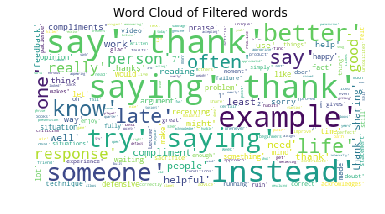

In [56]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(result_freq_words))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud of Filtered words")

In [57]:
! pip install TextBlob

In [58]:


# textblob has a pre-trained sentiment analysis model that we can use
from textblob import TextBlob



In [61]:
myList= ' '.join(result_freq_words)
processed_text = TextBlob(myList)

print(processed_text.sentiment)

Sentiment(polarity=0.11366524907017865, subjectivity=0.4978099150458305)


In [63]:


# import ploting library 
import matplotlib.pyplot as plt

# draw plot in notebook
%matplotlib inline



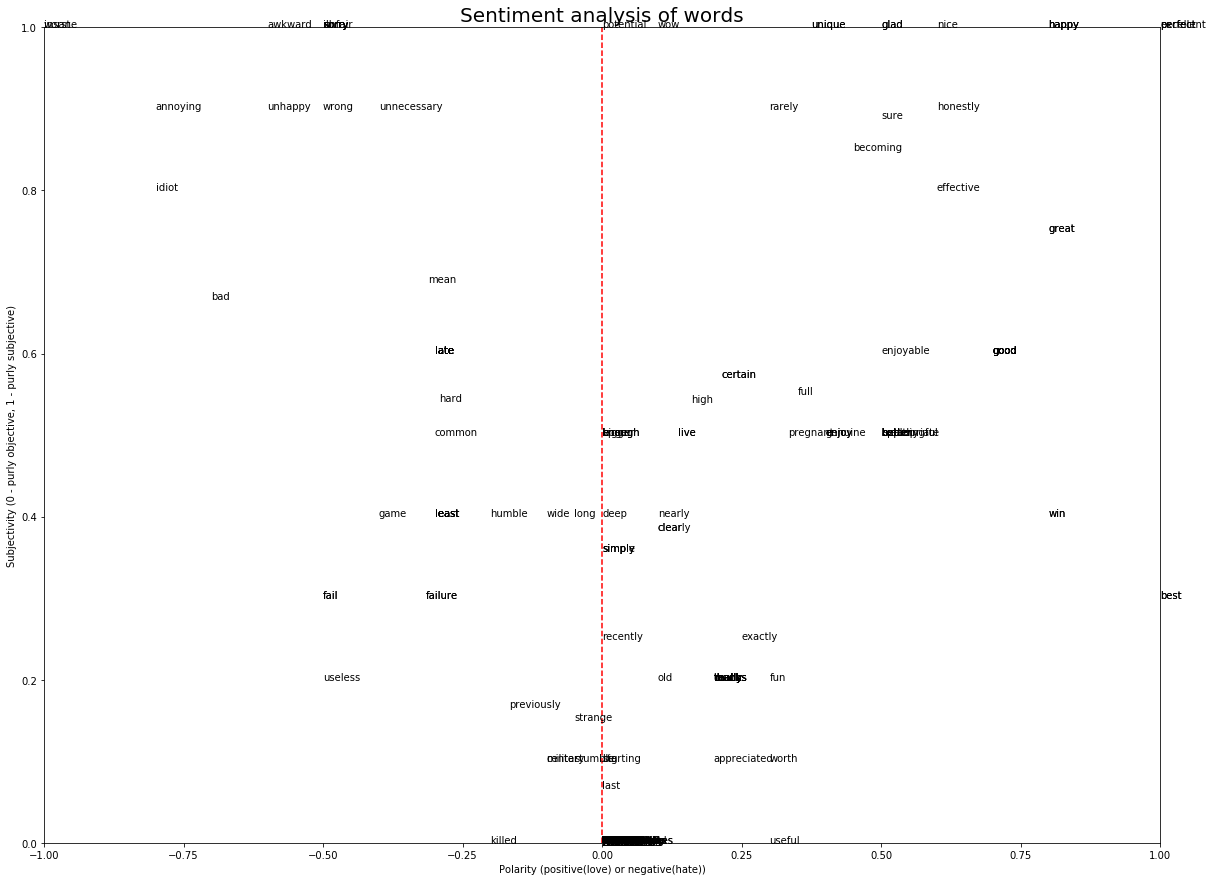

In [67]:


# big it a big plot
plt.figure(figsize=(20,15))

# for each word draw the text on teh char using the sentiment score as the x and y coordinates
for word in result_freq_words:
    word_sentiment = TextBlob(word).sentiment
    plt.text(word_sentiment.polarity, # x coordinate
             word_sentiment.subjectivity, # y coordinate
             word) # the text to draw

# set axis ranges 

plt.xlim(-1, 1)
plt.ylim(0, 1)

# draw line in middle
plt.axvline(0, color='red', linestyle='dashed')

# label axis
plt.title('Sentiment analysis of words', fontsize=20)
plt.xlabel('Polarity (positive(love) or negative(hate))')
plt.ylabel('Subjectivity (0 - purly objective, 1 - purly subjective)')

# display
plt.show()